Conducted a productivity study, analyzing historical data of equipment output per hour (L/H) categorized by SKU. The primary objective is to assess if our planning aligns with the desired productivity levels, comparing them against set targets. Our analysis encompasses the following key steps:

We scrutinize the distribution of hourly productivity, focusing on identifying the median value for comparison with our targets.
Additionally, we compute hourly productivity rates and assess whether the maximum output aligns with our predefined objectives.
Utilizing the Pareto principle, we identify critical equipment areas warranting focused attention and subsequently devise actionable plans to bolster operational efficiency."

In [ ]:
#Importing database

import pandas as pd

lista_equipamentos = pd.read_excel ('1. Lista de equipamentos.xlsx', dtype={'Recurso': str})
lista_SKU = pd.read_excel('2. Lista SKU.xlsx', dtype={'Código': str })
hist_producao = pd.read_excel('3. PRODUCAO ENVASE BALANCA.xlsx', dtype={'Material': str, 'Recurso': str, 'Qtd.boa confirmada (GMEIN)': float, 'Operação': str})
equipamentos_prod = pd.read_excel ('4. Produtividade equipamentos.xlsx')

In [ ]:
#Checking data type
tipos_de_dados1 = lista_SKU.dtypes
print (tipos_de_dados1)

Código                   object
Descrição                object
Tipo                     object
Integrador Formulação    object
Integrador               object
Integrador  Envase       object
Contador                  int64
dtype: object


In [ ]:
#Checking data type
tipos_de_dados2 = lista_equipamentos.dtypes
print (tipos_de_dados2)

Recurso SAP         object
Processo            object
Planta              object
Equipamento         object
Subprocesso         object
SKUs envase         object
Nomeclatura Dash    object
Recurso_1           object
Recurso             object
Planta ajustada     object
dtype: object


In [ ]:
#Checking data type
tipos_de_dados3 = hist_producao.dtypes
print (tipos_de_dados3)

Material                                   object
Descrição material                         object
Ordem                                       int64
Qtd.boa confirmada (GMEIN)                float64
Unid.medida básica (=GMEIN)                object
Recurso                                    object
Operação                                   object
Data de lançamento                 datetime64[ns]
Hora de entrada da confirmação             object
Inserido por usuário                       object
Atividade 1 a confirmar (ILE01)             int64
dtype: object


In [ ]:
#Checking main database information (historical data)
hist_producao.head()

,Material,Descrição material,Ordem,Qtd.boa confirmada (GMEIN),Unid.medida básica (=GMEIN),Recurso,Operação,Data de lançamento,Hora de entrada da confirmação,Inserido por usuário,Atividade 1 a confirmar (ILE01)
0,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:26:29,602082,0
1,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:40:36,602082,0
2,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:01:44,602082,0
3,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:18:58,602082,0
4,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:29:51,602082,0


In [ ]:
#Removing empty values
hist_producao = hist_producao.dropna(subset=['Material'])
hist_producao.head(30)

,Material,Descrição material,Ordem,Qtd.boa confirmada (GMEIN),Unid.medida básica (=GMEIN),Recurso,Operação,Data de lançamento,Hora de entrada da confirmação,Inserido por usuário,Atividade 1 a confirmar (ILE01)
0,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:26:29,602082,0
1,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:40:36,602082,0
2,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:01:44,602082,0
3,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:18:58,602082,0
4,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:29:51,602082,0
5,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:36:37,602082,0
6,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:49:01,602082,0
7,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,17:21:47,602082,0
8,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,17:31:37,602082,0
9,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,17:52:42,602082,0


In [ ]:
#Renaming column Material with standard
lista_SKU.rename(columns={lista_SKU.columns[0]: 'Material'}, inplace=True)

In [ ]:
#Adding the type of SKU and the equipment name

hist_producao = pd.merge(hist_producao, lista_SKU[['Material','Integrador  Envase']], on =['Material'], how='left' )
hist_producao = pd.merge(hist_producao, lista_equipamentos[['Recurso','Equipamento']], on =['Recurso'], how='left' )


In [ ]:
#Keeping only "61" items, which are the items of interest (final product code starts with "61")
hist_producao = hist_producao[hist_producao['Material'].str.startswith('61')]
hist_producao.head()

,Material,Descrição material,Ordem,Qtd.boa confirmada (GMEIN),Unid.medida básica (=GMEIN),Recurso,Operação,Data de lançamento,Hora de entrada da confirmação,Inserido por usuário,Atividade 1 a confirmar (ILE01),Integrador Envase,Equipamento
0,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:26:29,602082,0,CX/20,JS9
1,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:40:36,602082,0,CX/20,JS9
2,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:01:44,602082,0,CX/20,JS9
3,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:18:58,602082,0,CX/20,JS9
4,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:29:51,602082,0,CX/20,JS9


In [ ]:
#Renaming columns
hist_producao.rename(columns={hist_producao.columns[3]: 'Qtde'}, inplace=True)
hist_producao.rename(columns={hist_producao.columns[7]: 'Data Dia'}, inplace=True)
hist_producao.rename(columns={hist_producao.columns[8]: 'Data hora'}, inplace=True)
hist_producao.rename(columns={hist_producao.columns[11]: 'SKU'}, inplace=True)
hist_producao.head()

<ipython-input-10-e1d5b2c25f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_producao.rename(columns={hist_producao.columns[3]: 'Qtde'}, inplace=True)
<ipython-input-10-e1d5b2c25f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_producao.rename(columns={hist_producao.columns[7]: 'Data Dia'}, inplace=True)
<ipython-input-10-e1d5b2c25f10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_producao.rename(columns={hist

,Material,Descrição material,Ordem,Qtde,Unid.medida básica (=GMEIN),Recurso,Operação,Data Dia,Data hora,Inserido por usuário,Atividade 1 a confirmar (ILE01),SKU,Equipamento
0,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:26:29,602082,0,CX/20,JS9
1,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,15:40:36,602082,0,CX/20,JS9
2,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:01:44,602082,0,CX/20,JS9
3,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:18:58,602082,0,CX/20,JS9
4,6100529,MAXSAN - CX/20L,1059524,600.0,L,0403,0100,2023-01-10,16:29:51,602082,0,CX/20,JS9


In [ ]:
#Removing quantities higher than 900, which are errors of the report
hist_producao = hist_producao[(hist_producao['Qtde'] <= 900) & (hist_producao['Qtde'] >= -900)]

In [ ]:
#Merging date (day/month/year) with hour info
hist_producao['DataCompleta'] = hist_producao['Data Dia'] + pd.to_timedelta(hist_producao['Data hora'].astype(str))

In [ ]:
# Rounding the hour to use as a reference to calculate productivity by hour
hist_producao['Data Arredondada Baixo'] = hist_producao['DataCompleta'].dt.floor('H')

In [ ]:
#Creating column to validate the hours that will actually be computed (remove meal hours, start and ending of production)
hist_producao['Validacao'] = ''

In [ ]:
#Calculate productivity by hour, product, SKU and equipment

Agrupamento = ['Material','Descrição material','Equipamento','Data Arredondada Baixo','SKU']
produtividade_hora = hist_producao.groupby(Agrupamento)['Qtde'].sum().reset_index()

#Adding the target by equipment and SKU
produtividade_hora = pd.merge(produtividade_hora, equipamentos_prod[['Equipamento','SKU','Produtividade por hora']], on =['Equipamento','SKU'], how='left' )

#Dropping equipments/SKU without target (possible error of database)
produtividade_hora = produtividade_hora.dropna(subset=['Produtividade por hora'])

produtividade_hora.head()

,Material,Descrição material,Equipamento,Data Arredondada Baixo,SKU,Qtde,Produtividade por hora
0,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 13:00:00,CX/12,1440.0,2100.0
1,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 14:00:00,CX/12,480.0,2100.0
2,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 17:00:00,CX/12,480.0,2100.0
3,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 20:00:00,CX/12,480.0,2100.0
4,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 21:00:00,CX/12,480.0,2100.0


In [ ]:
#Create a list of valid hours that are considered in the calculation. It needs to have production 1 hour before and 1 hour after.
#(Removes beginning and ending of production,production stops and others)


resultados = []


for index, row in produtividade_hora.iterrows():
    hora_alvo = row['Data Arredondada Baixo']
    produto_alvo = row['Material']
    recurso_alvo = row['Equipamento']

    hora_anterior = produtividade_hora[
        (produtividade_hora['Data Arredondada Baixo'] >= hora_alvo - pd.Timedelta(hours=1)) &
        (produtividade_hora['Data Arredondada Baixo'] < hora_alvo) &
        (produtividade_hora['Material'] == produto_alvo) &
        (produtividade_hora['Equipamento'] == recurso_alvo)
    ]

    hora_posterior = produtividade_hora[
        (produtividade_hora['Data Arredondada Baixo'] > hora_alvo) &
        (produtividade_hora['Data Arredondada Baixo'] <= hora_alvo + pd.Timedelta(hours=1)) &
        (produtividade_hora['Material'] == produto_alvo) &
        (produtividade_hora['Equipamento'] == recurso_alvo)
    ]


    producao_anterior = len(hora_anterior) > 0
    producao_posterior = len(hora_posterior) > 0
    coluna = 'Validacao'
    linha = row

    resultados.append({'HoraAlvo': hora_alvo, 'Producao': producao_anterior & producao_posterior})
    produtividade_hora.at[index, coluna] = producao_anterior & producao_posterior

resultados_df = pd.DataFrame(resultados)


In [ ]:
#Filter the results that are valid

#Creates a database (df) to keep all the original info including valid and not valid hours
df = produtividade_hora

#Database for reference with only valid hours
produtividade_hora = produtividade_hora[produtividade_hora['Validacao'] == True]

df.head()

,Material,Descrição material,Equipamento,Data Arredondada Baixo,SKU,Qtde,Produtividade por hora,Validacao
0,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 13:00:00,CX/12,1440.0,2100.0,False
1,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 14:00:00,CX/12,480.0,2100.0,False
2,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 17:00:00,CX/12,480.0,2100.0,False
3,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 20:00:00,CX/12,480.0,2100.0,False
4,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 21:00:00,CX/12,480.0,2100.0,True


In [ ]:
#Adds the name of the plant of the equipment (easier for the management team to understand which equipment is)
produtividade_hora = pd.merge(produtividade_hora, lista_equipamentos[['Equipamento', 'Planta ajustada']], on='Equipamento')
produtividade_hora.head()

,Material,Descrição material,Equipamento,Data Arredondada Baixo,SKU,Qtde,Produtividade por hora,Validacao,Planta ajustada
0,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 21:00:00,CX/12,480.0,2100.0,True,IF LIQ
1,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-23 22:00:00,CX/12,480.0,2100.0,True,IF LIQ
2,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-24 03:00:00,CX/12,960.0,2100.0,True,IF LIQ
3,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-24 04:00:00,CX/12,480.0,2100.0,True,IF LIQ
4,6100030,SUMITHION 500 EC - CX/12L,JS4,2023-01-24 05:00:00,CX/12,480.0,2100.0,True,IF LIQ


In [ ]:
#Checks number of rows and columns for the database
print(produtividade_hora.shape[0],hist_producao.shape[0] )

14419 121153


In [ ]:
#Creates a ppt presentation with one slide by equipment with each SKU, distribution, máximum, median and target

import matplotlib.pyplot as plt
!pip install python-pptx
import math
from pptx import Presentation
from pptx.util import Inches
import io
from pptx.enum.text import PP_ALIGN
from PIL import Image
from pptx.util import Inches, Cm, Pt
from pptx.dml.color import RGBColor

# Creates PowerPoint with layout widescreen
presentation = Presentation()
presentation.slide_width = Inches(16)
presentation.slide_height = Inches(9)

# Creates a dictionary for tracking the slides by equipment
equipamento_slides = {}
matriz_data = {'Equipamento': [], 'SKU': [], 'Planta ajustada': [], 'Qtde Horas': [], 'Mediana de produtividade': [], 'Meta de produtividade': []}

for (equipamento, sku, planta_ajustada), grupo in produtividade_hora.groupby(['Equipamento', 'SKU', 'Planta ajustada']):

    #Removing negative values (error)
    grupo = grupo[grupo['Qtde']>0]

   #Creates a fig
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(grupo['Qtde'], bins=10, color='#D3D3D3', edgecolor='black')
    mediana = grupo['Qtde'].median()
    filtro = equipamentos_prod[(equipamentos_prod['Equipamento'] == equipamento) & (equipamentos_prod['SKU'] == sku)]
    meta = filtro['Produtividade por hora'].median()
    qtde_horas = len(grupo['Qtde'])
    if math.isnan(meta):
        meta = 0

    # Draw median line and target line
    plt.axvline(mediana, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana}')
    plt.axvline(meta, color='green', linestyle='dashed', linewidth=2, label=f'Meta: {int(meta)}')
    plt.text(mediana, plt.ylim()[1], f'Mediana: {int(mediana)}', color='red', verticalalignment='top', horizontalalignment='left')
    plt.text(meta, plt.ylim()[1] - (plt.ylim()[1] * 0.05), f'Meta: {int(meta)}', color='green', verticalalignment='top', horizontalalignment='left')
    ax.set_xlabel('Produtividade (kg.L) por hora', fontsize = 14)
    ax.set_ylabel('Frequência / Qtde horas', fontsize = 14)
    ax.set_title(f'Histograma de Produtividade por hora para: \nEquipamento: {equipamento} ({planta_ajustada}), SKU: {sku}, Qtde horas: {qtde_horas}',  fontsize = 18)

    # Saves fig
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    plt.close(fig)

     # Add image to the list of the slide
    if equipamento not in equipamento_slides:
        equipamento_slides[equipamento] = {'imagens': [], 'planta_ajustada': planta_ajustada}
    equipamento_slides[equipamento]['imagens'].append(buffer)

    matriz_data['Equipamento'].append(equipamento)
    matriz_data['SKU'].append(sku)
    matriz_data['Planta ajustada'].append(planta_ajustada)
    matriz_data['Qtde Horas'].append(qtde_horas)
    matriz_data['Mediana de produtividade'].append(mediana)
    matriz_data['Meta de produtividade'].append(meta)

#Creates a new table
matriz_df = pd.DataFrame(matriz_data)

#Iterates equipment adding for each slide all info for each equipment (charts, title)
for equipamento, data in equipamento_slides.items():
    imagens = data['imagens']
    planta_ajustada = data['planta_ajustada']

#Slide layout
    slide = presentation.slides.add_slide(presentation.slide_layouts[6])  # 6 é o layout em branco

#Slide title
    title_box = slide.shapes.add_textbox(left=Inches(0), top=Inches(0), width=Inches(14.4), height=Inches(1))
    title_frame = title_box.text_frame
    title = title_frame.paragraphs[0]
    title.text = f'Equipamento: {equipamento} ({planta_ajustada})'

#Font
    title.font.bold = True
    title.font.size = Pt(24)
    title.font.name = 'Calibri'
    title.font.color.rgb = RGBColor(192, 0, 0)  # Vermelho (192, 0, 0)

#Alignment
    title.alignment = PP_ALIGN.LEFT

#Position the charts
    for i, imagem_buffer in enumerate(imagens):
        imagem = Image.open(imagem_buffer)
        imagem.save(f'histogram_{i}.png')
        tamanho_vert = 4
        tamanho_hor = 7.5

        col = i % 2
        row = i // 2
        left = Cm(1.5) + 2* col * (Inches(tamanho_hor/2) + Cm(0))
        top = Cm(2) + 2* row * (Inches(tamanho_vert/2) + Inches(0))

        # Add image
        slide.shapes.add_picture(f'histogram_{i}.png', left, top, Inches(7.5), Inches(4))

# Save presentation
presentation.save('histogramas.pptx')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
#Getting a consolidate table by equipment, plant and SKU and calculating the "efficiency" and percentage of hours by each equipment and SKU
#Efficiency was set as the median value divided by the target

matriz_df['Produtividade'] = matriz_df['Mediana de produtividade'] / matriz_df['Meta de produtividade']
matriz_df['% horas'] = 100 * matriz_df['Qtde Horas'] /  matriz_df['Qtde Horas'].sum()
matriz_df.head()

,Equipamento,SKU,Planta ajustada,Qtde Horas,Mediana de produtividade,Meta de produtividade,Produtividade,% horas
0,Bosch-03,CX/12,WP2,265,864.0,1100.0,0.785455,1.838873
1,Bosch-04,CX/12,WP2,7,864.0,1100.0,0.785455,0.048574
2,Bosch-07,CX/12,WG,634,960.0,1500.0,0.640000,4.399417
3,Bosch-07,CX/20,WG,1828,1500.0,1500.0,1.000000,12.684755
4,ENV IF FW4,BB/20,IF FW4,654,6300.0,10000.0,0.630000,4.538200


In [ ]:
#Creates column merging Equipment and SKU
matriz_df['Equipamento / SKU'] = matriz_df['Equipamento'] + ' - ' + matriz_df['SKU']
matriz_df.head()

,Equipamento,SKU,Planta ajustada,Qtde Horas,Mediana de produtividade,Meta de produtividade,Produtividade,% horas,Equipamento / SKU
0,Bosch-03,CX/12,WP2,265,864.0,1100.0,0.785455,1.838873,Bosch-03 - CX/12
1,Bosch-04,CX/12,WP2,7,864.0,1100.0,0.785455,0.048574,Bosch-04 - CX/12
2,Bosch-07,CX/12,WG,634,960.0,1500.0,0.640000,4.399417,Bosch-07 - CX/12
3,Bosch-07,CX/20,WG,1828,1500.0,1500.0,1.000000,12.684755,Bosch-07 - CX/20
4,ENV IF FW4,BB/20,IF FW4,654,6300.0,10000.0,0.630000,4.538200,ENV IF FW4 - BB/20


In [ ]:
#Calculating the pareto equipment / SKU (accumulated 70% of the total hours)
import numpy as np
matriz_df = matriz_df.sort_values(by='Qtde Horas', ascending=False)
matriz_df['% horas Acumulado'] = matriz_df['% horas'].cumsum()
matriz_df.head()
limitador_horas = 70
pareto_horas = matriz_df.loc[matriz_df['% horas Acumulado'] > limitador_horas, 'Qtde Horas'].iloc[0]
print (pareto_horas)

506


In [ ]:
matriz_df = matriz_df.reset_index(drop=True)
matriz_df.head(20)

,Equipamento,SKU,Planta ajustada,Qtde Horas,Mediana de produtividade,Meta de produtividade,Produtividade,% horas,Equipamento / SKU,% horas Acumulado
0,JS7,BB/20,HB ENV,3401,7560.0,10000.0,0.756000,23.600028,JS7 - BB/20,23.600028
1,Bosch-07,CX/20,WG,1828,1500.0,1500.0,1.000000,12.684755,Bosch-07 - CX/20,36.284782
2,JS9,BB/10,IF LIQ,761,3750.0,6000.0,0.625000,5.280688,JS9 - BB/10,41.565471
3,Flex,BB/20,Flex,706,4950.0,10000.0,0.495000,4.899035,Flex - BB/20,46.464506
4,ENV IF FW4,BB/20,IF FW4,654,6300.0,10000.0,0.630000,4.538200,ENV IF FW4 - BB/20,51.002706
5,Bosch-07,CX/12,WG,634,960.0,1500.0,0.640000,4.399417,Bosch-07 - CX/12,55.402123
6,JS6,BB/20,HB ENV,614,5070.0,10000.0,0.507000,4.260634,JS6 - BB/20,59.662758
7,JS4,BB/20,IF LIQ,530,6300.0,10000.0,0.630000,3.677746,JS4 - BB/20,63.340504
8,JS2,CX/20,IF FW,521,2400.0,5000.0,0.480000,3.615294,JS2 - CX/20,66.955798
9,JS3,BB/10,IF FW,506,2250.0,3500.0,0.642857,3.511207,JS3 - BB/10,70.467004


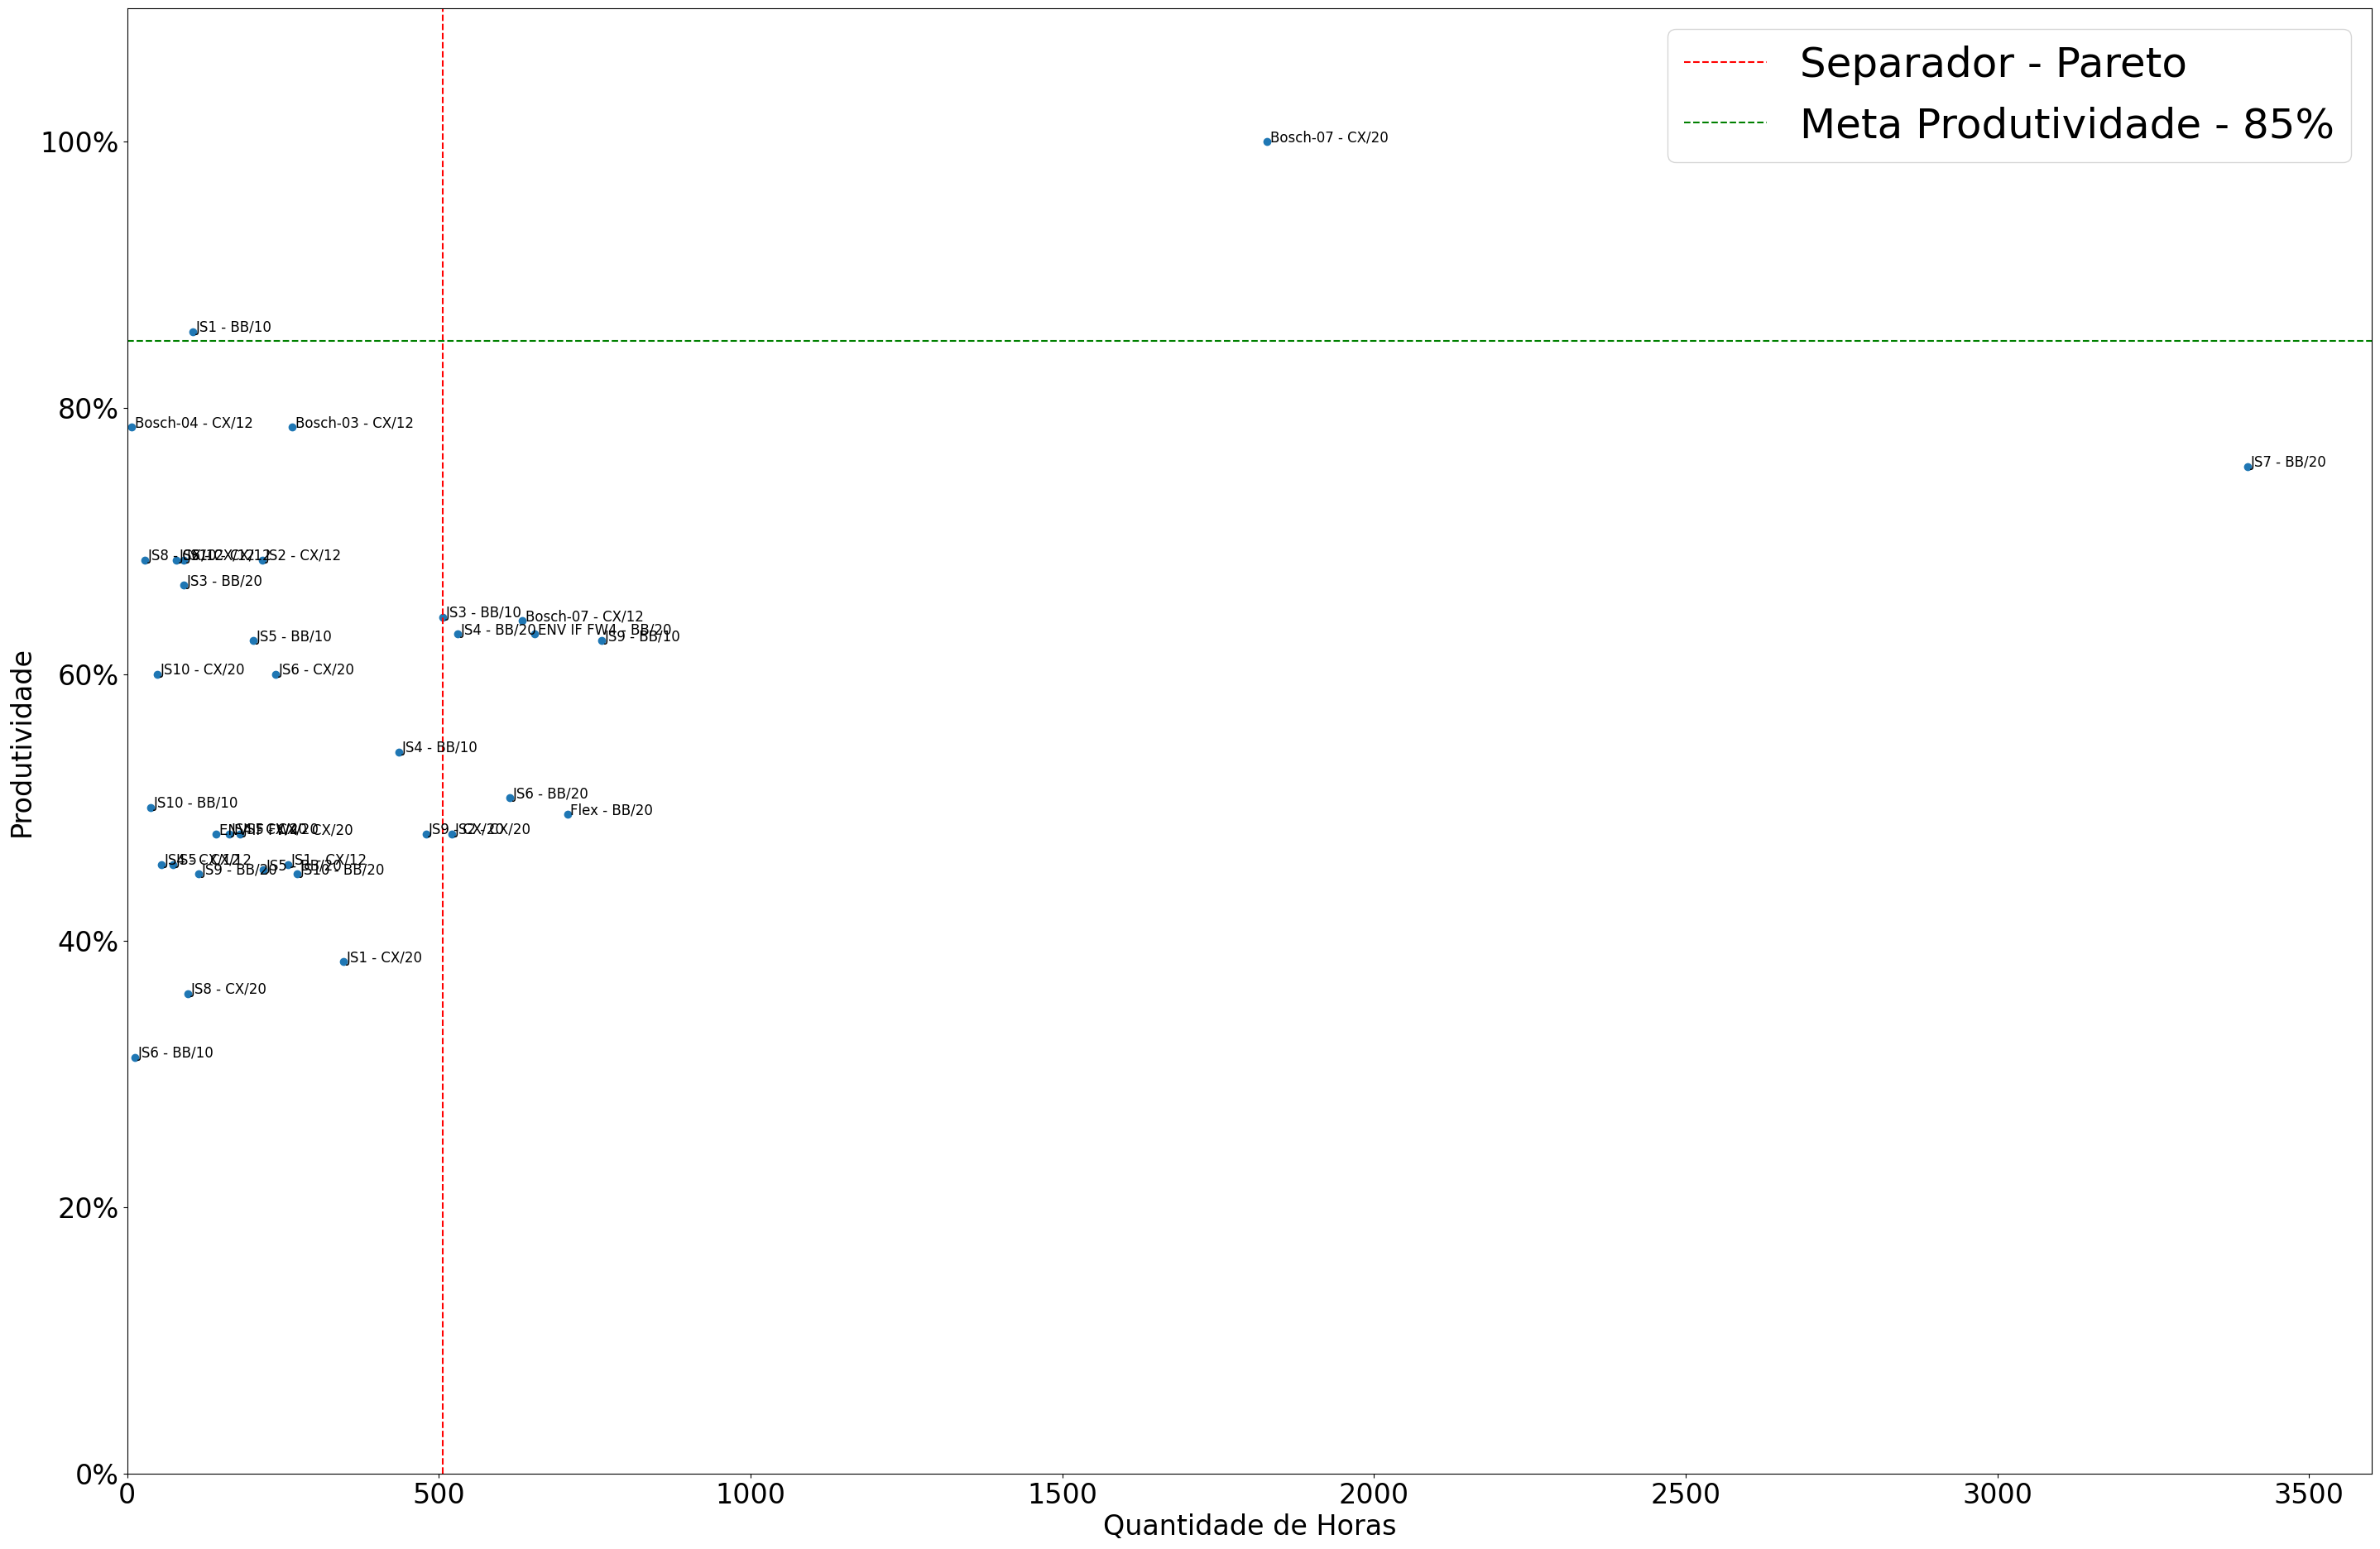

In [ ]:
#Generating a slide with a chart with the summary of all equipment

from pptx import Presentation
from pptx.util import Pt, Inches
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Open current presentation
presentation = Presentation('histogramas.pptx')

#Layout
slide_layout = presentation.slide_layouts[0]

#New slide
first_slide = presentation.slides.add_slide(slide_layout)

#Chart Size
largura_cm = 35
altura_cm = 23
largura = Inches(largura_cm * 0.393701)
altura = Inches(altura_cm * 0.393701)
left = (Inches(16) - largura) / 2
top = (Inches(9) - altura) / 2

#Fig
fig, ax = plt.subplots(figsize=(largura_cm, altura_cm))

#Scatter plot - Hours vs Efficiency
ax.scatter(matriz_df['Qtde Horas'], matriz_df['Produtividade'])

#Label
for i, equipamento in enumerate(matriz_df['Equipamento / SKU']):
    ax.annotate(equipamento, (matriz_df['Qtde Horas'][i]+5, matriz_df['Produtividade'][i]), fontsize=12)

# Adding the "Pareto" line and the target for Efficiency.
ax.axvline(x=pareto_horas, color='r', linestyle='--', label='Separador - Pareto')
ax.axhline(y=0.85, color='g', linestyle='--', label='Meta Produtividade - 85%')

# Axis as a percentage
def percent_formatter(x, pos):
    return f'{x:.0%}'
ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
ax.tick_params(labelsize=24)

# Label axis
ax.set_xlabel('Quantidade de Horas', fontsize=24)
ax.set_ylabel('Produtividade', fontsize=24)

#Legend
ax.legend(fontsize=36)

# Axis limits
ax.set_xlim(0, max(matriz_df['Qtde Horas']) + 200)
ax.set_ylim(0, max(matriz_df['Produtividade']) + 0.1)

# Add fig
fig.savefig('scatter_plot.png')
first_slide.shapes.add_picture('scatter_plot.png', left, top, largura, altura)

#Slide title
title_box = first_slide.shapes.add_textbox(left=Inches(0), top=Inches(0), width=Inches(14.4), height=Inches(1))
title_frame = title_box.text_frame
title = title_frame.paragraphs[0]
title.text = f'Resumo'

#Title font
title.font.bold = True
title.font.size = Pt(24)
title.font.name = 'Calibri'
title.font.color.rgb = RGBColor(192, 0, 0)  # Vermelho (192, 0, 0)

#Title Alignment
title.alignment = PP_ALIGN.LEFT

#Save presentation
presentation.save('histogramas_atualizado.pptx')

#Show Chart
plt.show()

In [ ]:
#Generating table with summary including max output per hour

#Grouping results
resumo_recurso = produtividade_hora.groupby(['Equipamento', 'SKU', 'Planta ajustada', 'Descrição material', 'Data Arredondada Baixo'])['Qtde'].sum()
resumo_recurso= resumo_recurso.reset_index()
resumo_recurso = resumo_recurso[resumo_recurso['Qtde']>0]
resumo_recurso.head()


,Equipamento,SKU,Planta ajustada,Descrição material,Data Arredondada Baixo,Qtde
0,Bosch-03,CX/12,WP2,SUMILEX 500 WP - CX/12KG,2023-01-21 09:00:00,864.0
1,Bosch-03,CX/12,WP2,SUMILEX 500 WP - CX/12KG,2023-01-21 19:00:00,864.0
2,Bosch-03,CX/12,WP2,SUMILEX 500 WP - CX/12KG,2023-01-21 20:00:00,864.0
3,Bosch-03,CX/12,WP2,SUMILEX 500 WP - CX/12KG,2023-01-21 21:00:00,864.0
4,Bosch-03,CX/12,WP2,SUMILEX 500 WP - CX/12KG,2023-01-21 22:00:00,288.0


In [ ]:

# Calculates the descriptive statistics
resumo_descritivo = resumo_recurso.groupby(['Equipamento', 'SKU']).describe(percentiles=[.25, .5, .75])
resumo_descritivo.head()

Qtde                                                   \
                    count         mean          std    min     25%     50%   
Equipamento SKU                                                              
Bosch-03    CX/12   265.0   785.524528   344.554918  144.0   480.0   864.0   
Bosch-04    CX/12     7.0   802.285714   273.942643  288.0   720.0   864.0   
Bosch-07    CX/12   634.0  1024.239748   399.762069  192.0   720.0   960.0   
            CX/20  1828.0  1386.761488   563.291031  200.0   900.0  1500.0   
ENV IF FW4  BB/20   654.0  6352.018349  2911.347061  320.0  4500.0  6300.0   

                                    
                      75%      max  
Equipamento SKU                     
Bosch-03    CX/12  1032.0   1440.0  
Bosch-04    CX/12  1008.0   1008.0  
Bosch-07    CX/12  1392.0   1896.0  
            CX/20  1800.0   2700.0  
ENV IF FW4  BB/20  9000.0  12600.0

In [ ]:

#Adding target to the table
resumo_descritivo = pd.merge(resumo_descritivo, equipamentos_prod[['Equipamento','SKU','Produtividade por hora']], on=['Equipamento','SKU'], how='left')
resumo_descritivo.head()

<ipython-input-28-b8c04872d927>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  resumo_descritivo = pd.merge(resumo_descritivo, equipamentos_prod[['Equipamento','SKU','Produtividade por hora']], on=['Equipamento','SKU'], how='left')


,Equipamento,SKU,"(Qtde, count)","(Qtde, mean)","(Qtde, std)","(Qtde, min)","(Qtde, 25%)","(Qtde, 50%)","(Qtde, 75%)","(Qtde, max)",Produtividade por hora
0,Bosch-03,CX/12,265.0,785.524528,344.554918,144.0,480.0,864.0,1032.0,1440.0,1100
1,Bosch-04,CX/12,7.0,802.285714,273.942643,288.0,720.0,864.0,1008.0,1008.0,1100
2,Bosch-07,CX/12,634.0,1024.239748,399.762069,192.0,720.0,960.0,1392.0,1896.0,1500
3,Bosch-07,CX/20,1828.0,1386.761488,563.291031,200.0,900.0,1500.0,1800.0,2700.0,1500
4,ENV IF FW4,BB/20,654.0,6352.018349,2911.347061,320.0,4500.0,6300.0,9000.0,12600.0,10000


In [ ]:

# Calculates percentage using median, mean and max vs target
resumo_descritivo['% máximo'] = resumo_descritivo['Qtde', 'max'] / resumo_descritivo['Produtividade por hora']
resumo_descritivo['% media'] = resumo_descritivo['Qtde', 'mean'] / resumo_descritivo['Produtividade por hora']
resumo_descritivo['% mediana'] = resumo_descritivo['Qtde', '50%'] / resumo_descritivo['Produtividade por hora']
resumo_descritivo.head()

,Equipamento,SKU,"(Qtde, count)","(Qtde, mean)","(Qtde, std)","(Qtde, min)","(Qtde, 25%)","(Qtde, 50%)","(Qtde, 75%)","(Qtde, max)",Produtividade por hora,% máximo,% media,% mediana
0,Bosch-03,CX/12,265.0,785.524528,344.554918,144.0,480.0,864.0,1032.0,1440.0,1100,1.309091,0.714113,0.785455
1,Bosch-04,CX/12,7.0,802.285714,273.942643,288.0,720.0,864.0,1008.0,1008.0,1100,0.916364,0.729351,0.785455
2,Bosch-07,CX/12,634.0,1024.239748,399.762069,192.0,720.0,960.0,1392.0,1896.0,1500,1.264000,0.682826,0.640000
3,Bosch-07,CX/20,1828.0,1386.761488,563.291031,200.0,900.0,1500.0,1800.0,2700.0,1500,1.800000,0.924508,1.000000
4,ENV IF FW4,BB/20,654.0,6352.018349,2911.347061,320.0,4500.0,6300.0,9000.0,12600.0,10000,1.260000,0.635202,0.630000


In [ ]:
#Renaming column for quantity of hours
resumo_descritivo.rename(columns={resumo_descritivo.columns[2]: 'Qtde horas'}, inplace=True)

In [ ]:
#Exporting excel file
nome_arquivo_excel = 'Produtividade por hora.xlsx'


with pd.ExcelWriter(nome_arquivo_excel, engine='openpyxl') as writer:
   hist_producao.to_excel(writer, sheet_name= 'Base historica', index=False)
   df.to_excel(writer, sheet_name= 'Producao hora geral', index=False)
   produtividade_hora.to_excel(writer, sheet_name= 'Producao hora valida', index=False)
   resumo_descritivo.to_excel(writer, sheet_name= 'Resumo Recurso', index=False)